# Example - Bike Sharing

## 1. Data Acqusition

In [1]:
# code below prevents scrollbars

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
# Load the dataset

# This dataset is from UCI
# https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# 
# instant: record index
# dteday : date
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# yr : year (0: 2011, 1:2012) - data spans two years
# mnth : month ( 1 to 12)
# hr : hour (0 to 23)
# holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# weekday : day of the week (0:Sunday, 1:Monday ...  6:Saturday)
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# hum: Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)
# casual: count of casual users
# registered: count of registered users
# cnt: count of total rental bikes including both casual and registered

# the business problem is to predict the total bike rentals given the month, day, weather conditions etc.

df = pd.read_csv('hour.csv')
print(df.head(10))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16

## 2. Preliminary Data Analysis 

In [5]:
# Get size and shape of the dataset
print('Initial size of the dataset:', df.shape)

Initial size of the dataset: (17379, 17)


In [6]:
# customize the column names
df.rename(columns={'instant':'record_id',
                   'dteday':'thedate',
                   'yr':'year',
                   'mnth':'month',
                   'hr': 'hour',
                   'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'temp': 'temperature',
                   'atemp':'felt_temperature',
                   'hum':'humidity',
                   'casual':'no_of_casual_users',
                   'registered':'no_of_registered_users',
                   'cnt': 'total_rentals'},inplace=True)
print(df.head(10))

   record_id     thedate  season  year  month  hour  is_holiday  weekday  \
0          1  2011-01-01       1     0      1     0           0        6   
1          2  2011-01-01       1     0      1     1           0        6   
2          3  2011-01-01       1     0      1     2           0        6   
3          4  2011-01-01       1     0      1     3           0        6   
4          5  2011-01-01       1     0      1     4           0        6   
5          6  2011-01-01       1     0      1     5           0        6   
6          7  2011-01-01       1     0      1     6           0        6   
7          8  2011-01-01       1     0      1     7           0        6   
8          9  2011-01-01       1     0      1     8           0        6   
9         10  2011-01-01       1     0      1     9           0        6   

   is_workingday  weather_condition  temperature  felt_temperature  humidity  \
0              0                  1         0.24            0.2879      0.81   
1  

In [7]:
# get data types
print('Initial Data Types:\n',df.dtypes)

Initial Data Types:
 record_id                   int64
thedate                    object
season                      int64
year                        int64
month                       int64
hour                        int64
is_holiday                  int64
weekday                     int64
is_workingday               int64
weather_condition           int64
temperature               float64
felt_temperature          float64
humidity                  float64
windspeed                 float64
no_of_casual_users          int64
no_of_registered_users      int64
total_rentals               int64
dtype: object


In [8]:
# set data types

# date time conversion
df['thedate'] = pd.to_datetime(df.thedate)
# since the year, month and day of the week information is already captured, later we can drop the 'thedate' column.

# setting the categorical variables
df['season'] = df.season.astype('category')
df['year'] = df.year.astype('category')
df['month'] = df.month.astype('category')
df['hour'] = df.hour.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')


In [9]:
# get corrected data types
print('Corrected Data Types:\n',df.dtypes)

Corrected Data Types:
 record_id                          int64
thedate                   datetime64[ns]
season                          category
year                            category
month                           category
hour                            category
is_holiday                      category
weekday                         category
is_workingday                   category
weather_condition               category
temperature                      float64
felt_temperature                 float64
humidity                         float64
windspeed                        float64
no_of_casual_users                 int64
no_of_registered_users             int64
total_rentals                      int64
dtype: object


## 3. Data Cleansing

In [10]:
# check for any duplicated rows, keep the first one
df.drop_duplicates(subset=None, keep='first', inplace=True)
print(df.shape)

(17379, 17)


* We have 17,000+ data points 

In [11]:
# no need to check for '?' in strings since we have no string datatype

In [12]:
# temp was divided by 41. 
# Let's use the actual temps during visualization. We can scale it later.
df['temperature'] = df['temperature'] * 41

In [13]:
# similarly felt_temperature was divided by 50. 
# Let's use the actual felt temps during visualization. We can scale it later.
df['felt_temperature'] = df['felt_temperature'] * 50

In [14]:
# windspeed was also normalized
# Let's use the actual windspeed during visualization. We can scale it later.
df['windspeed'] = df['windspeed'] * 67

In [15]:
# since the year, month and day of the week information is already captured, we can drop the 'thedate' column.
del df['thedate']

In [16]:
# check for any columns that contain null values
pd.isna(df).any()

record_id                 False
season                    False
year                      False
month                     False
hour                      False
is_holiday                False
weekday                   False
is_workingday             False
weather_condition         False
temperature               False
felt_temperature          False
humidity                  False
windspeed                 False
no_of_casual_users        False
no_of_registered_users    False
total_rentals             False
dtype: bool

* We have no missing/null values

In [17]:
# get a count of null values
# we do not have null values
# print(df.isnull().sum())

## 4. Exploratory Data Analysis (EDA)

### Statistics

In [18]:
# fundamental statistics, with precision to 3 digits
pd.set_option('precision', 3)
print(df.describe())

       record_id  temperature  felt_temperature   humidity  windspeed  \
count  17379.000    17379.000         17379.000  17379.000  17379.000   
mean    8690.000       20.376            23.789      0.627     12.737   
std     5017.029        7.895             8.593      0.193      8.197   
min        1.000        0.820             0.000      0.000      0.000   
25%     4345.500       13.940            16.665      0.480      7.002   
50%     8690.000       20.500            24.240      0.630     12.998   
75%    13034.500       27.060            31.060      0.780     16.998   
max    17379.000       41.000            50.000      1.000     56.997   

       no_of_casual_users  no_of_registered_users  total_rentals  
count           17379.000               17379.000      17379.000  
mean               35.676                 153.787        189.463  
std                49.305                 151.357        181.388  
min                 0.000                   0.000          1.000  
25%    

* Means vary significantly between the independent variables

In [19]:
# correlation table
pd.set_option('precision', 2)
print(df.corr(method='pearson'))

                        record_id  temperature  felt_temperature  humidity  \
record_id                1.00e+00         0.14              0.14  9.58e-03   
temperature              1.36e-01         1.00              0.99 -6.99e-02   
felt_temperature         1.38e-01         0.99              1.00 -5.19e-02   
humidity                 9.58e-03        -0.07             -0.05  1.00e+00   
windspeed               -7.45e-02        -0.02             -0.06 -2.90e-01   
no_of_casual_users       1.58e-01         0.46              0.45 -3.47e-01   
no_of_registered_users   2.82e-01         0.34              0.33 -2.74e-01   
total_rentals            2.78e-01         0.40              0.40 -3.23e-01   

                        windspeed  no_of_casual_users  no_of_registered_users  \
record_id                   -0.07                0.16                    0.28   
temperature                 -0.02                0.46                    0.34   
felt_temperature            -0.06                0.45 

* The correlation graph given below is easier to analyze.

###  Visualization

In [20]:
# Univariate analysis for numerical values

# plt.rcParams["figure.figsize"]=10,10


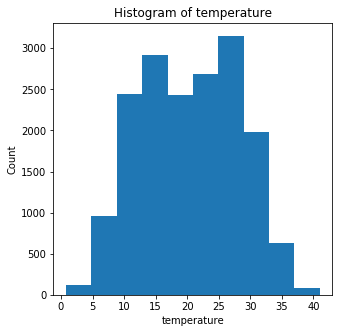

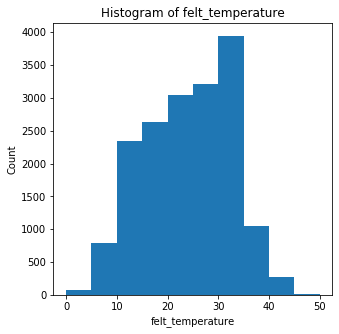

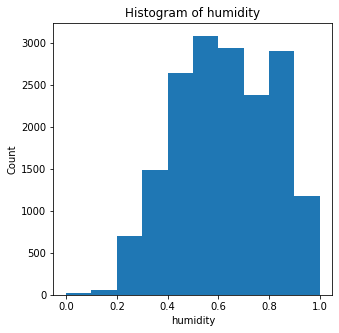

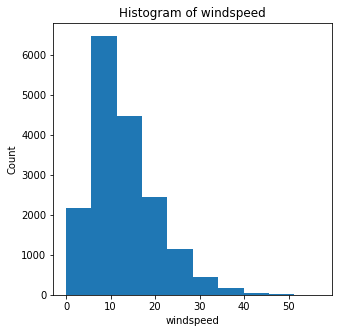

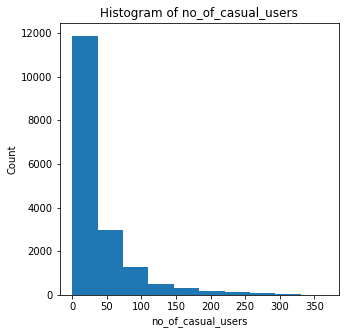

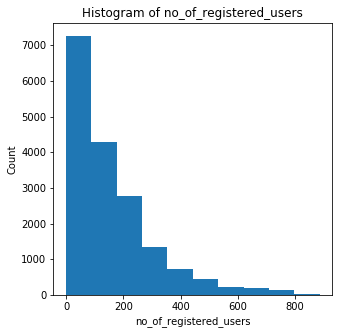

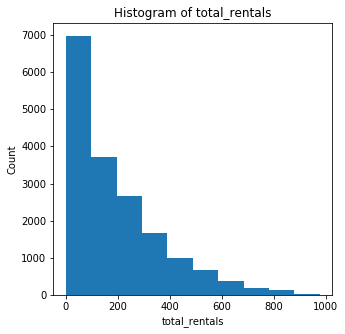

In [21]:
# display histograms for numerical columns

def plot_histograms(the_df,cols, the_bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(5,5))  # define plot area
        ax = fig.gca()   # define axis
        counts = the_df[col].plot.hist(ax = ax , bins = the_bins)
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        plt.show()

numerical_cols = ['temperature','felt_temperature','humidity','windspeed','no_of_casual_users',
                  'no_of_registered_users','total_rentals']
plot_histograms(df,numerical_cols,10)


* Physical measurements such as temperature, humidity etc have Gaussian distributions (as expected)

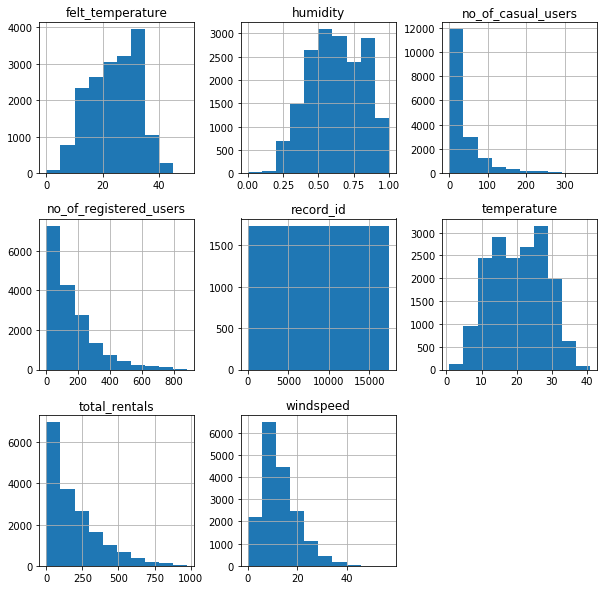

In [22]:
# here is a simpler method to draw histograms for all numeric values
plt.rcParams["figure.figsize"]=10,10
df.hist()
plt.show()

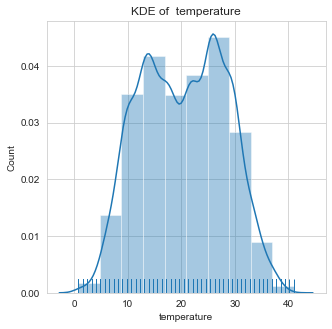

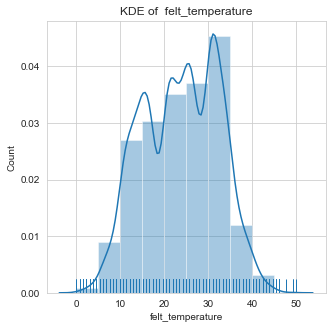

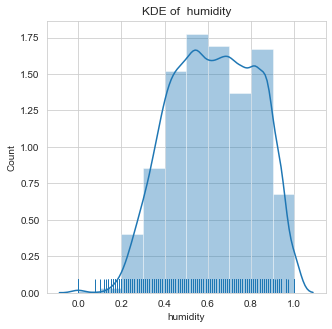

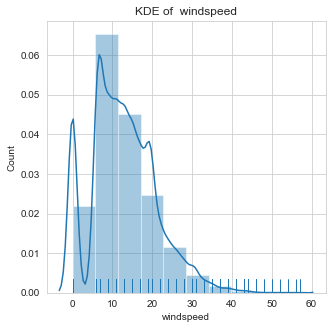

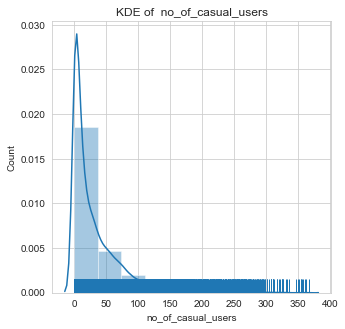

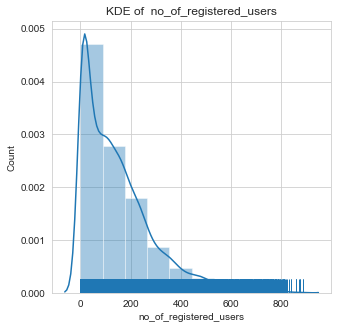

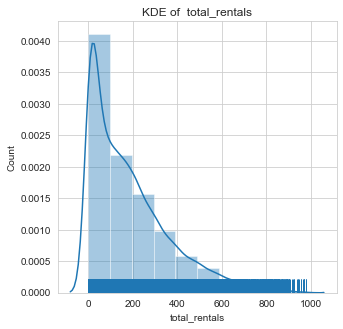

In [23]:
# plot density histograms (KDE plots)
plt.rcParams["figure.figsize"]=5,5
def plot_density_histograms(the_df, cols, the_bins = 10, the_hist = 'False'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(the_df[col], bins = the_bins, rug = True, hist = the_hist)
        plt.title('KDE of  ' + col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


numerical_cols = ['temperature','felt_temperature','humidity','windspeed','no_of_casual_users','no_of_registered_users','total_rentals']

plot_density_histograms(df,numerical_cols)

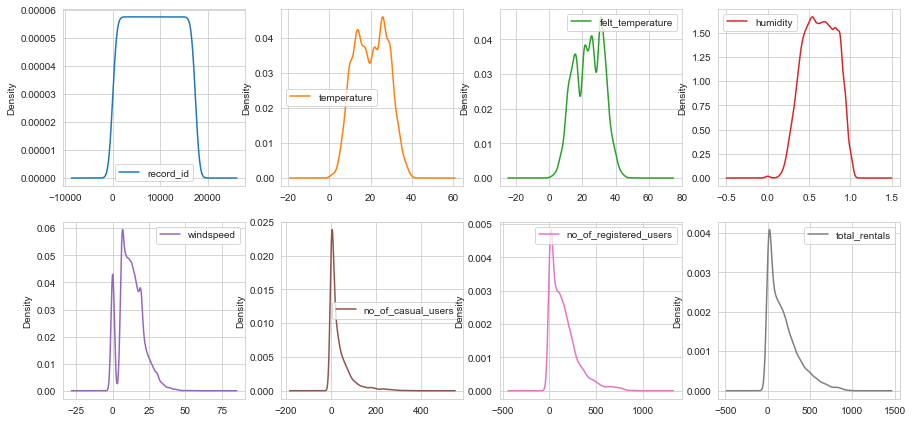

In [24]:
# here is a simpler method to draw density histogtams (KDE plots)
plt.rcParams["figure.figsize"]=15,15
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

In [25]:
# calculate frequency count for categorical columms
#def count_unique(the_df,cols):
#    for col in cols:
#        print('\n' + 'For column ' + col)
#        print(the_df[col].value_counts())
#
#categorical_cols = ['season','year','month','hour','is_holiday','weekday','is_workingday','weather_condition']
#
#count_unique(df,categorical_cols)

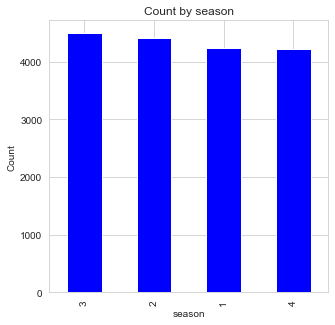

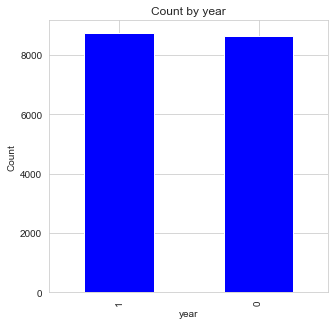

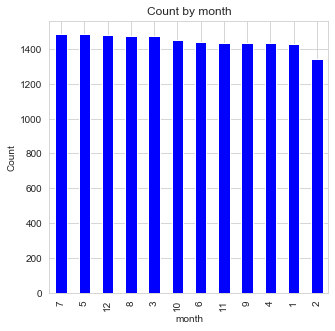

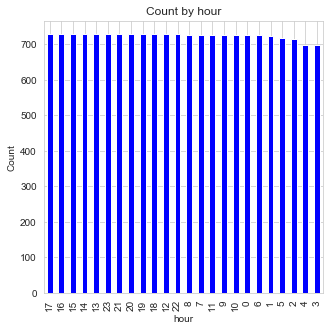

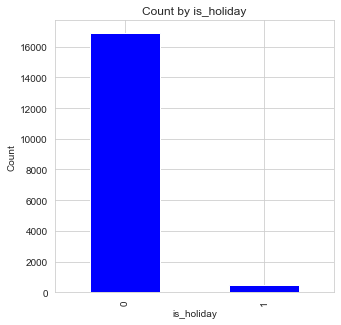

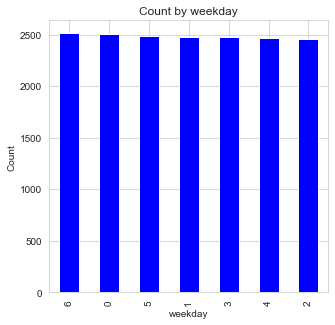

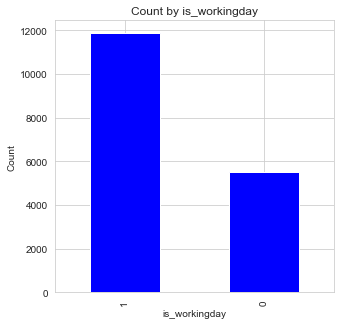

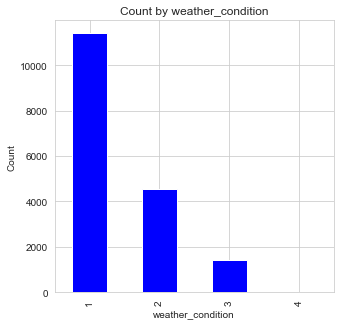

In [26]:
# display bar charts for categorical variables
def plot_bar_charts(the_df,cols):
    for col in cols:
        fig = plt.figure(figsize=(5,5))  # define plot area
        ax = fig.gca()   # define axis
        counts = the_df[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Count by ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        plt.show()

categorical_cols = ['season','year','month','hour','is_holiday','weekday','is_workingday','weather_condition']
plot_bar_charts(df,categorical_cols)

* There are very few bike rentals during holidays. Also there no bike rentals during heavy rain etc (weather_condition = 4)

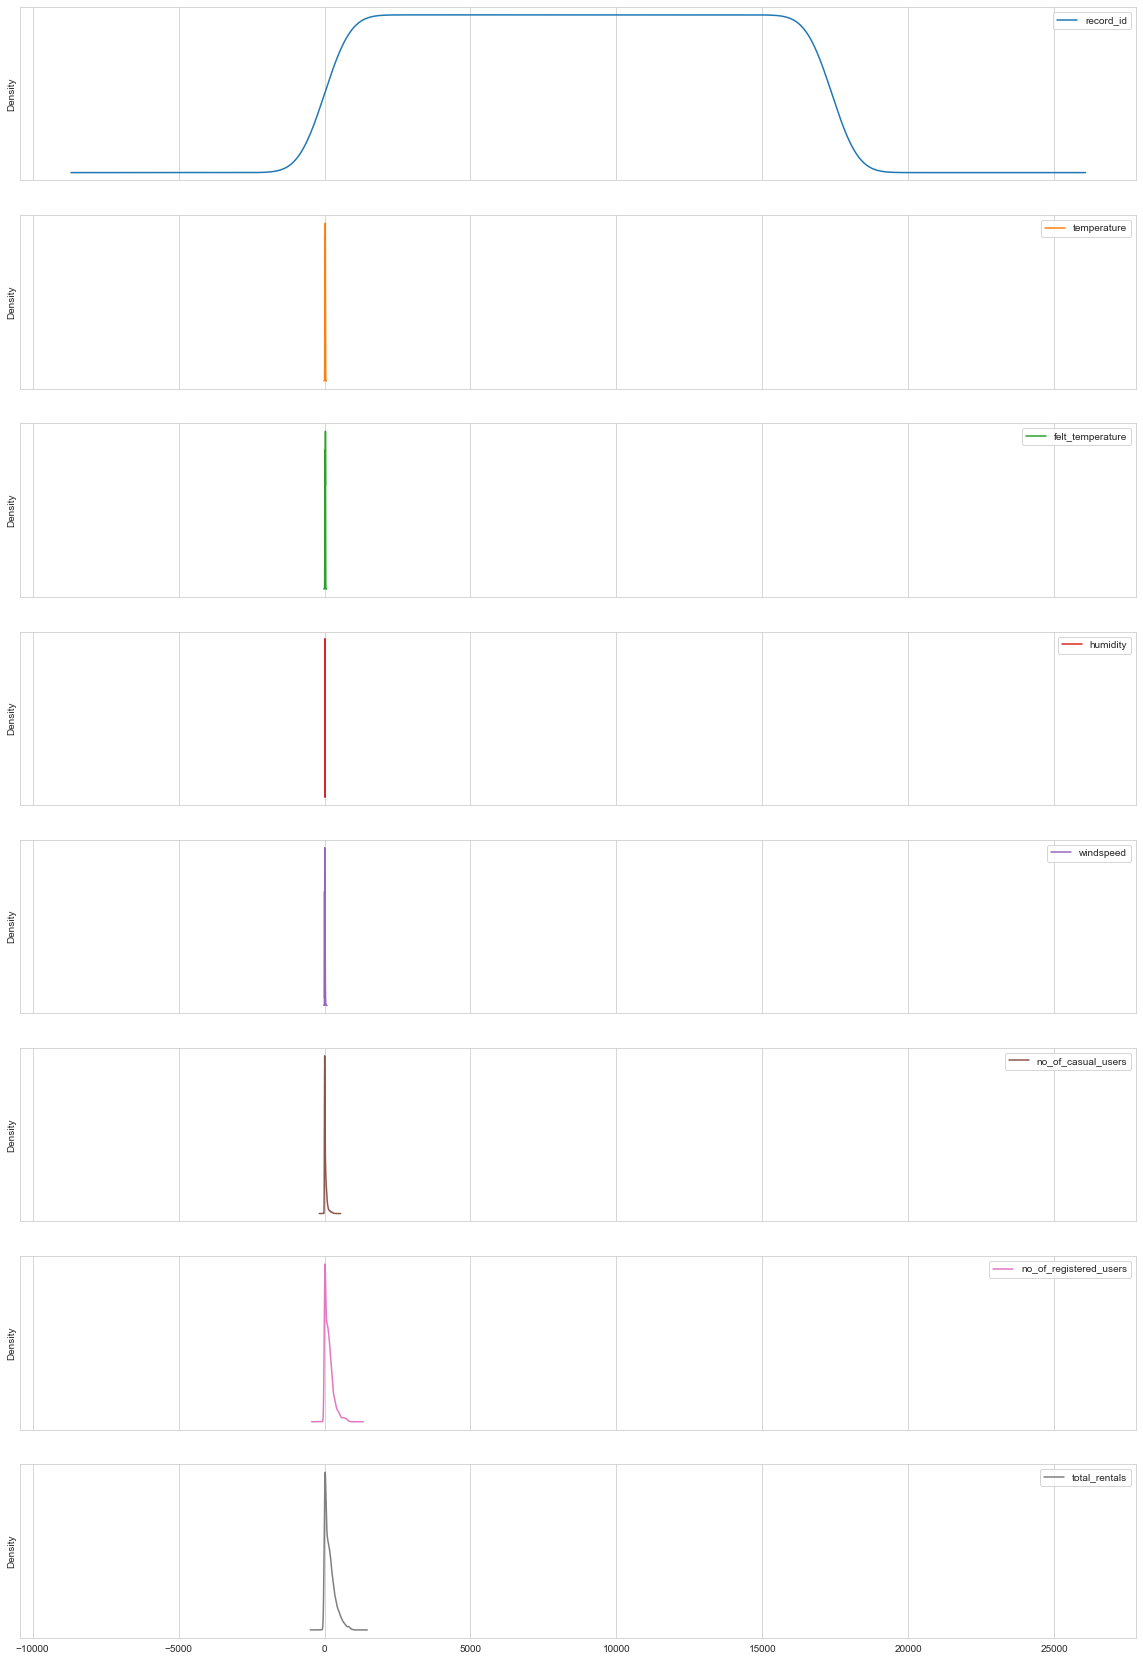

In [27]:
# an alternate method to display KDE plots
df.plot.density(figsize=(20, 30), subplots=True, yticks=[])
plt.show()

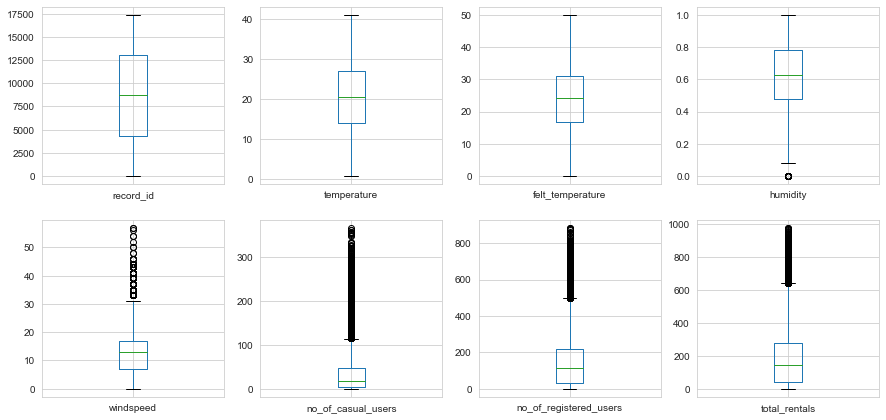

In [28]:
# draw box and whiskers plots for numerical variables
plt.rcParams["figure.figsize"]=15,15
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

* Windspeed, no_of_casual_users and no_of_registered_users have significant number of outliers

[Text(0.5, 1.0, 'Hourly Rentals for different seasons')]

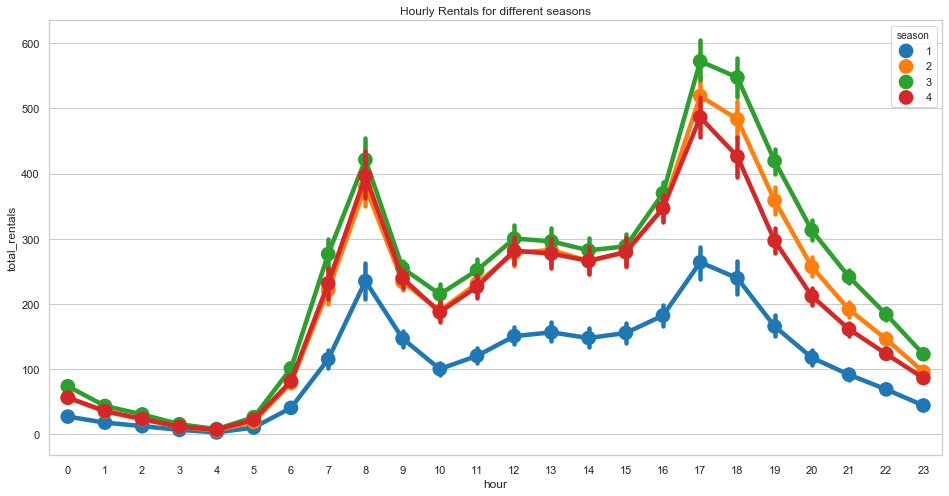

In [43]:
# Multivariate analysis

# stacked Line Plot
# total rentals per hour per season (totaled for both years)
plt.rcParams["figure.figsize"]=16,8
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour','total_rentals','season']], x='hour',y='total_rentals', hue='season',ax=ax)
ax.set(title="Hourly Rentals for different seasons")

* Most bike rentals are during morning (7:00 AM to 10:00 AM) and afterwork hours (17:00-19:00).

[Text(0.5, 1.0, 'Hourly Rentals for different days of the week')]

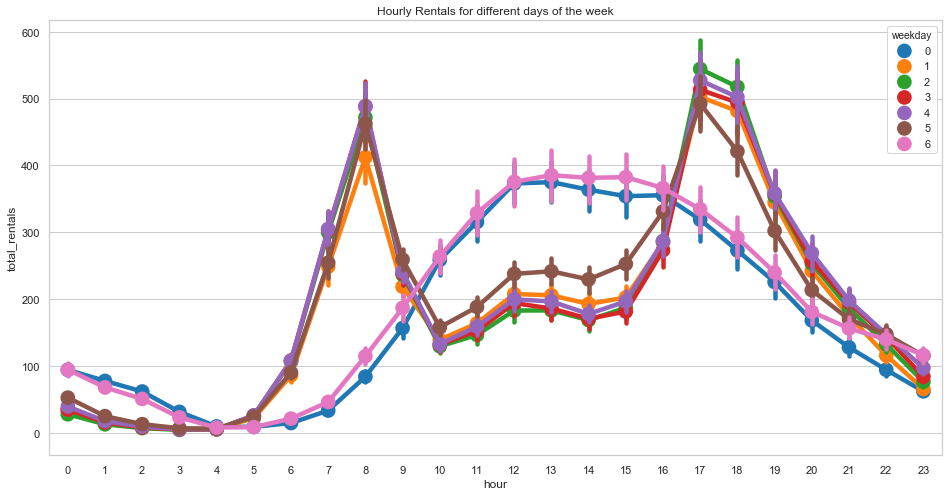

In [41]:
# stacked Line Plot
# total rentals per hour per day of the week (totaled for both years)
plt.rcParams["figure.figsize"]=16,8
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour','total_rentals','weekday']], x='hour',y='total_rentals', hue='weekday',ax=ax)
ax.set(title="Hourly Rentals for different days of the week")

* During weekday, most bike rentals are in the morning (7:00 to 9:00) or after work hours (17:00 - 19:00)
* However on the weekends, most rentals are midday (10:00 to 19:00)

[Text(0.5, 1.0, 'Total rentals per month')]

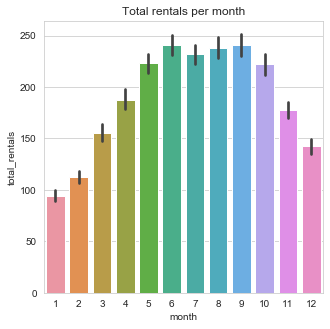

In [31]:
# total_rentals by month
plt.rcParams["figure.figsize"]=5,5
fig,ax = plt.subplots()
sns.barplot(data=df[['month','total_rentals']], x="month",y="total_rentals")
ax.set(title="Total rentals per month")

* Most rentals occur during spring and summer.

[Text(0.5, 1.0, 'Total rentals per month and season')]

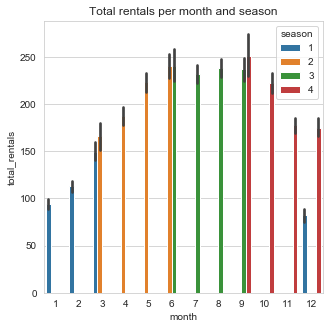

In [32]:
# total_rentals by month for each season
plt.rcParams["figure.figsize"]=5,5
fig,ax = plt.subplots()
sns.barplot(data=df[['month','total_rentals','season']], x="month",y="total_rentals", hue = "season", ax = ax)
ax.set(title="Total rentals per month and season")

* Same conclusion as above. Most bike rentals take place during spring and summer. 

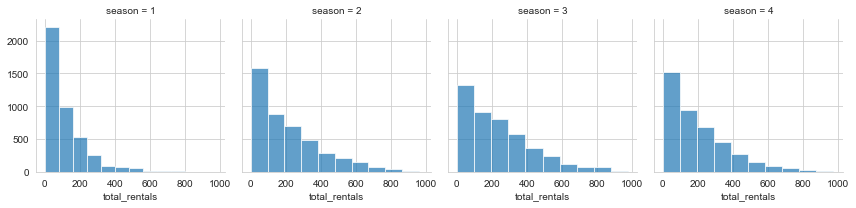

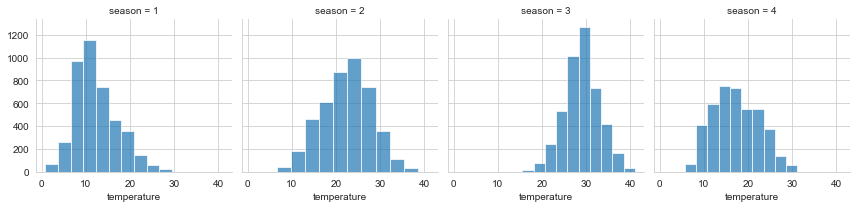

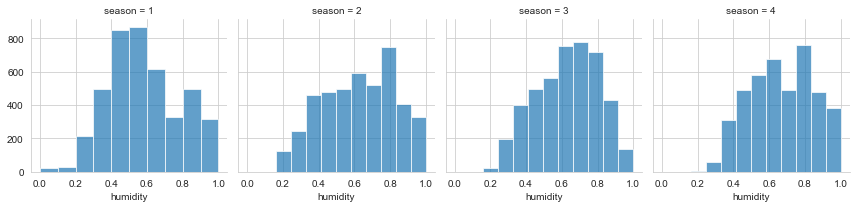

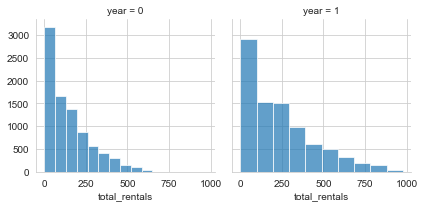

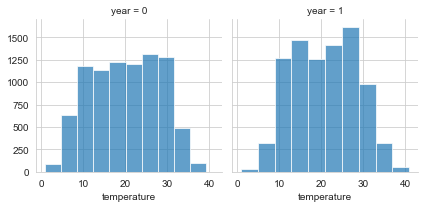

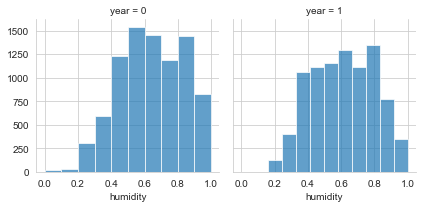

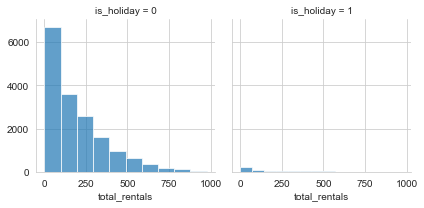

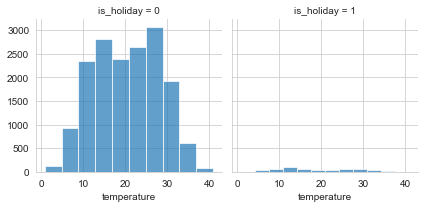

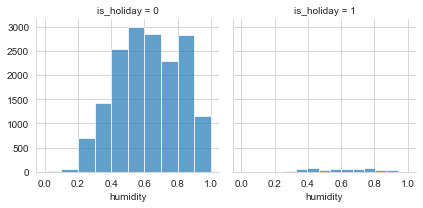

In [33]:
# conditional histograms
plt.rcParams["figure.figsize"]=10,10
def plot_conditional_histograms(the_df, plot_cols,grid_cols):
    for grid_col in grid_cols:
        # loop over the list of columns
        for col in plot_cols:
            grid1 = sns.FacetGrid(the_df, col = grid_col)
            grid1.map(plt.hist, col, alpha = .7)


plot_cols = ['total_rentals','temperature','humidity']
categorical_cols = ['season','year','is_holiday']
plot_conditional_histograms(df, plot_cols, categorical_cols)

* In the histograms above, we only needed "total_rentals" but it is fun to analyze other factors.

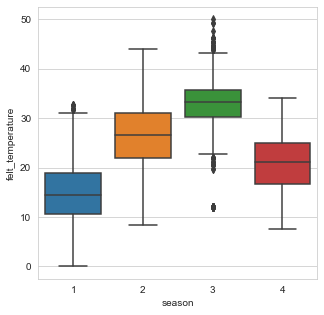

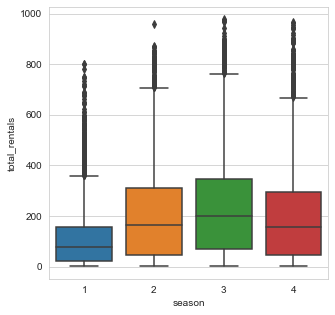

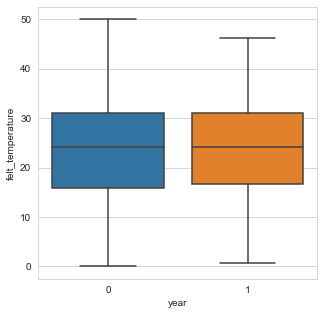

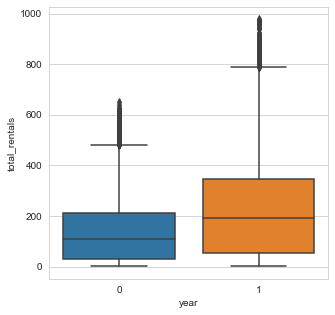

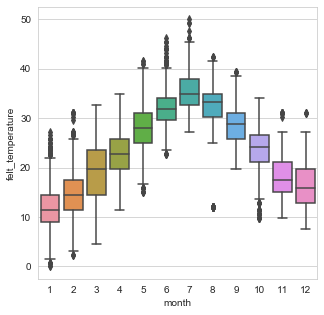

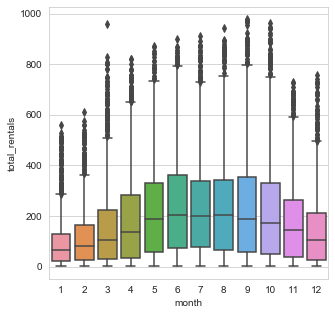

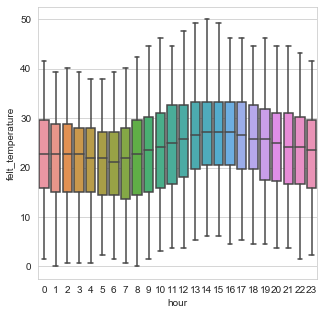

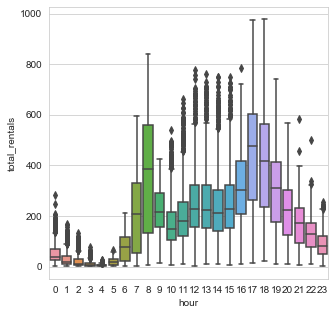

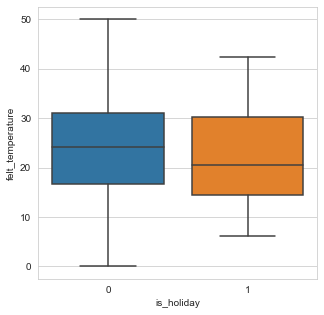

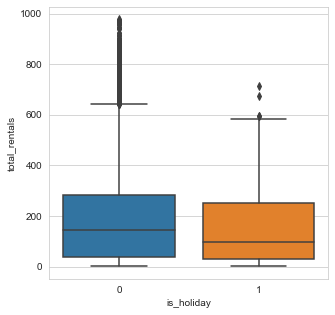

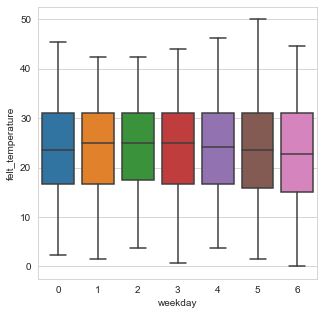

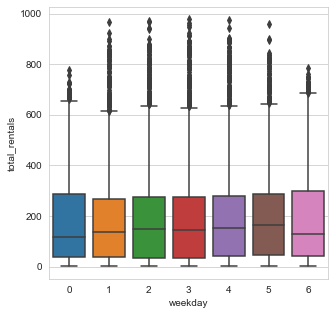

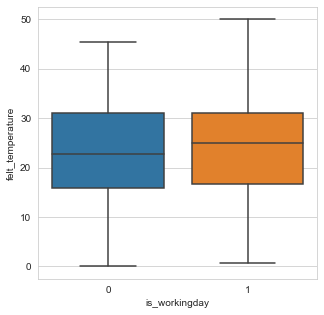

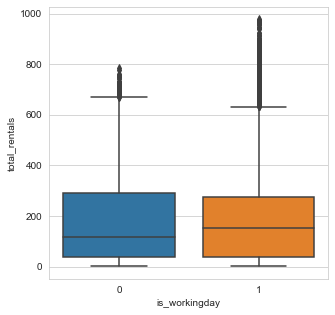

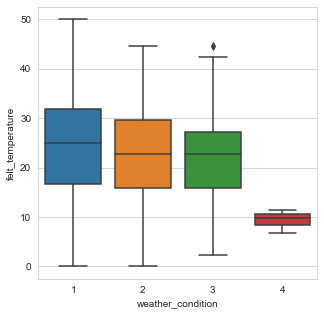

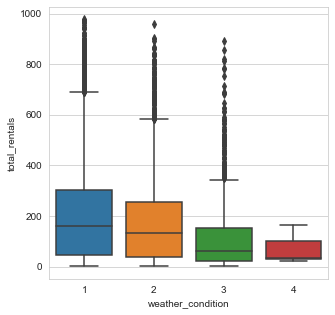

In [34]:
plt.rcParams["figure.figsize"]=5,5

def plot_box_and_whiskers_plots(the_df, cols, catvars):
    for catvar in catvars:
        for col in cols:
            sns.set_style("whitegrid")
            sns.boxplot(catvar, col, data=the_df)
            plt.xlabel(catvar) # Set text for the x axis
            plt.ylabel(col)# Set text for y axis
            plt.show()

# even though we are only interested in the dependent variable ('total_rentals') we will plot 
# 'felt_temperature' as well just for fun
numerical_cols = ['felt_temperature','total_rentals']
categorical_cols = ['season','year','month','hour','is_holiday','weekday','is_workingday','weather_condition']
plot_box_and_whiskers_plots(df, numerical_cols, categorical_cols)


* As seen before on the line plots, most rentals occur during morning or after work hours.
* There were more bike rentals in 2001 compare to 2000.

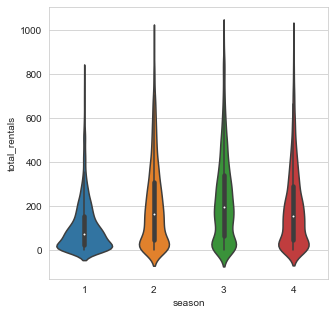

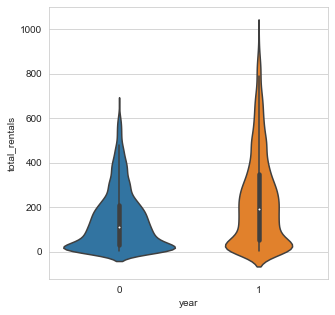

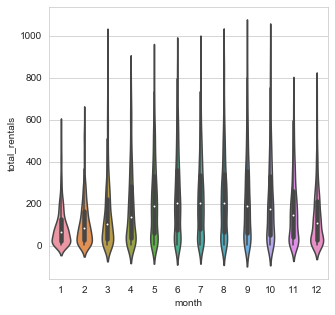

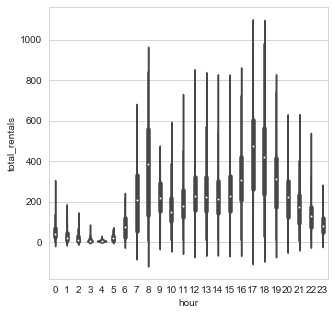

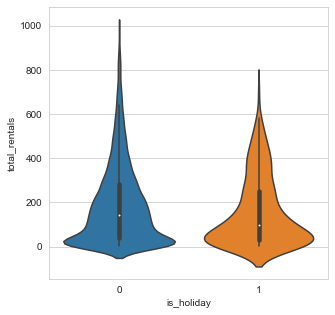

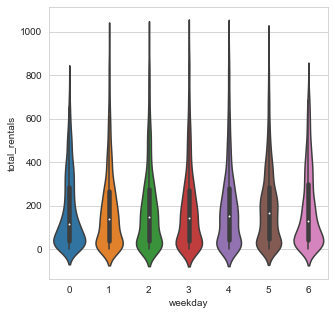

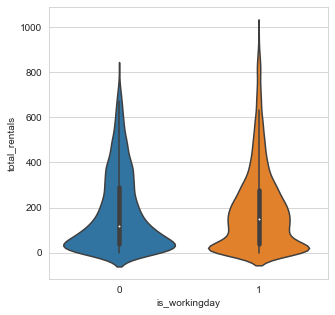

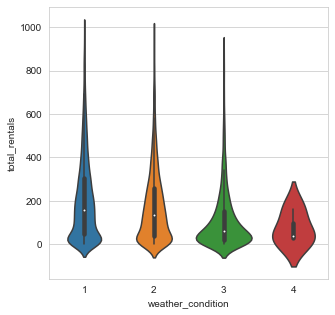

In [35]:
plt.rcParams["figure.figsize"]=5,5

# draw violin plots
def plot_violin_plots(the_df, cols, catvars):
    for catvar in catvars:
        for col in cols:
            sns.set_style("whitegrid")
            sns.violinplot(catvar, col, data=the_df)
            plt.xlabel(catvar) # Set text for the x axis
            plt.ylabel(col)# Set text for y axis
            plt.show()

numerical_cols = ['total_rentals']
categorical_cols = ['season','year','month','hour','is_holiday','weekday','is_workingday','weather_condition']
plot_violin_plots(df, numerical_cols, categorical_cols)


* similar results as boxplots with distribution

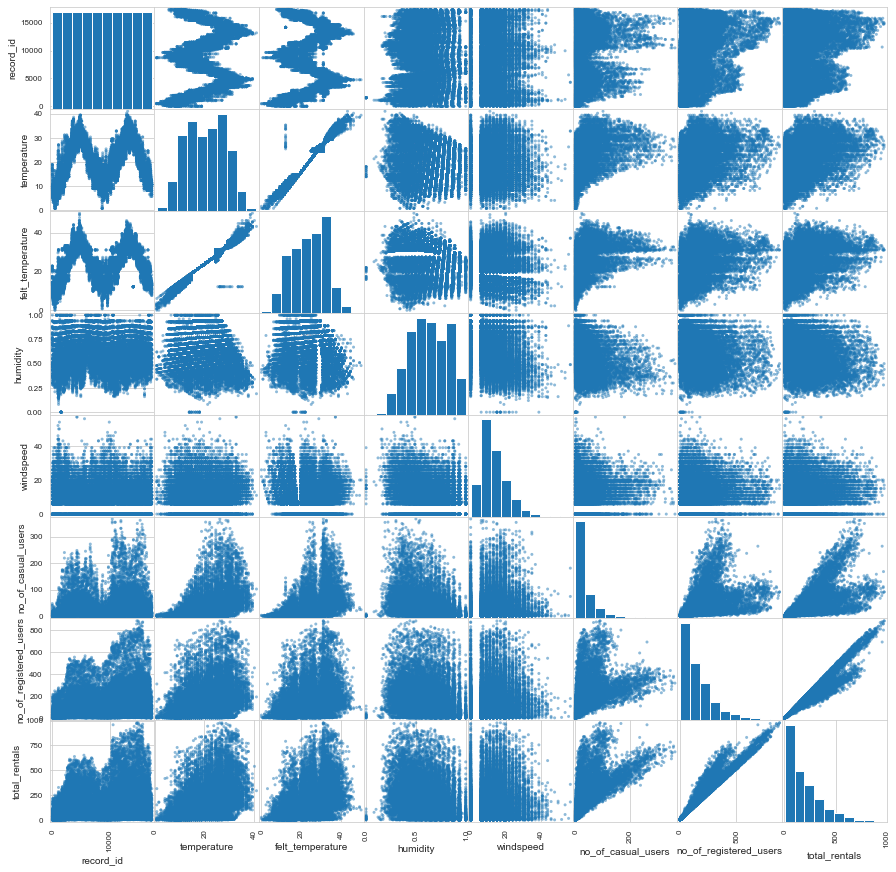

In [36]:
# scatter plot matrix
plt.rcParams["figure.figsize"]=15,15
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

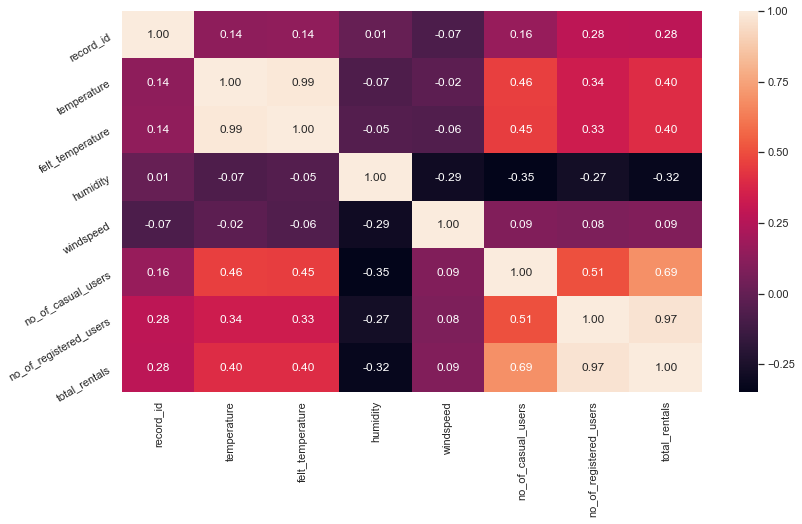

In [37]:
# draw correlation matrix
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* overall most correlation values are small
* as expected no_of_casual_users and no_of_registered_users are highly correlated to total_rentals since
* total_rentals = no_of_casual_users + no_of_registered_users

* humidity and windspeed are negatively correlated
* temperature and felt_temperature are also highly correlated since they are related to humidity

In [38]:
# drawing frequency bins
# df.plot.box(figsize=(12,7), xticks=[])
# plt.title('Boxplots of all frequency bins')
# plt.xlabel('Frequency bin')
# plt.ylabel('Power spectral density (normalized)')
# plt.show()

## 5. Feature Engineering

In [39]:
# feature transformations

# feature selection

## 6. Evaluation of  Algorithms

### Spliting-out for the validation dataset

### Setting Test Options and Evaluation Metric

### Spot Checking of the Algorithms

### Comparing the Algorithms

## 7. Improving Model Accuracy

### Algorithm Tuning

### Ensembles

## 8. Finalizing the Model

### Predictions on validation dataset

### Creating the standalone model on entire training dataset

### Saving the model for later use

## 9. Findings and Closing Remarks